# rsna2018 Notes

This notebook presents a small sample of x-ray images from the competition, marked with both the "ground truth" boxes provided by human radiologists (in blue) and the boxes predicted by the model (in pink.)

Obviously I had to use x-rays from the training set to produce this comparison (otherwise I would not have ground truth boxes to compare against,) but they were ones that I never actually used for training, so this is a fair indication of the model's performance.

There is a bit of commentary after the images.

In [10]:
# get a list of the patient IDs represented by the sample files

import numpy as np
import pandas as pd
import os
from glob import glob

df_sample_files = pd.DataFrame({'file':glob('rsna/sample_pred/*.jpg')})
df_sample_files['pid'] = df_sample_files['file'].map(lambda x: os.path.splitext(os.path.basename(x))[0][:36])
sample_pid_list = list(df_sample_files['pid'].values)
print(sample_pid_list)

['bf9b012d-915c-4026-b989-c05312833b38', 'ba174e17-bdad-4a4e-98dc-21e270b93248', '7fb3e6fd-596b-41e7-815b-b2be3f856184', '9a8d7f49-ec4d-40db-998a-a1b81ad9ac52', 'a7b7222f-91db-467e-afb7-68f44f06c6a2', '549ee5af-e19d-4483-9f7b-d3025dbb1979']


In [11]:
# use the list of patient IDs to get the pertinent rows from the label file

df_labels = pd.read_csv('rsna/stage_1_train_labels.csv')
df_sample_labels = df_labels[df_labels['patientId'].isin(sample_pid_list)]
df_sample_labels

,patientId,x,y,width,height,Target
7155,549ee5af-e19d-4483-9f7b-d3025dbb1979,184.0,231.0,257.0,571.0,1
12559,7fb3e6fd-596b-41e7-815b-b2be3f856184,101.0,464.0,229.0,179.0,1
12560,7fb3e6fd-596b-41e7-815b-b2be3f856184,575.0,366.0,189.0,339.0,1
15918,9a8d7f49-ec4d-40db-998a-a1b81ad9ac52,599.0,334.0,159.0,164.0,1
17587,a7b7222f-91db-467e-afb7-68f44f06c6a2,632.0,476.0,277.0,294.0,1
20270,ba174e17-bdad-4a4e-98dc-21e270b93248,241.0,400.0,188.0,248.0,1
21140,bf9b012d-915c-4026-b989-c05312833b38,194.0,287.0,282.0,476.0,1
21141,bf9b012d-915c-4026-b989-c05312833b38,625.0,281.0,301.0,493.0,1


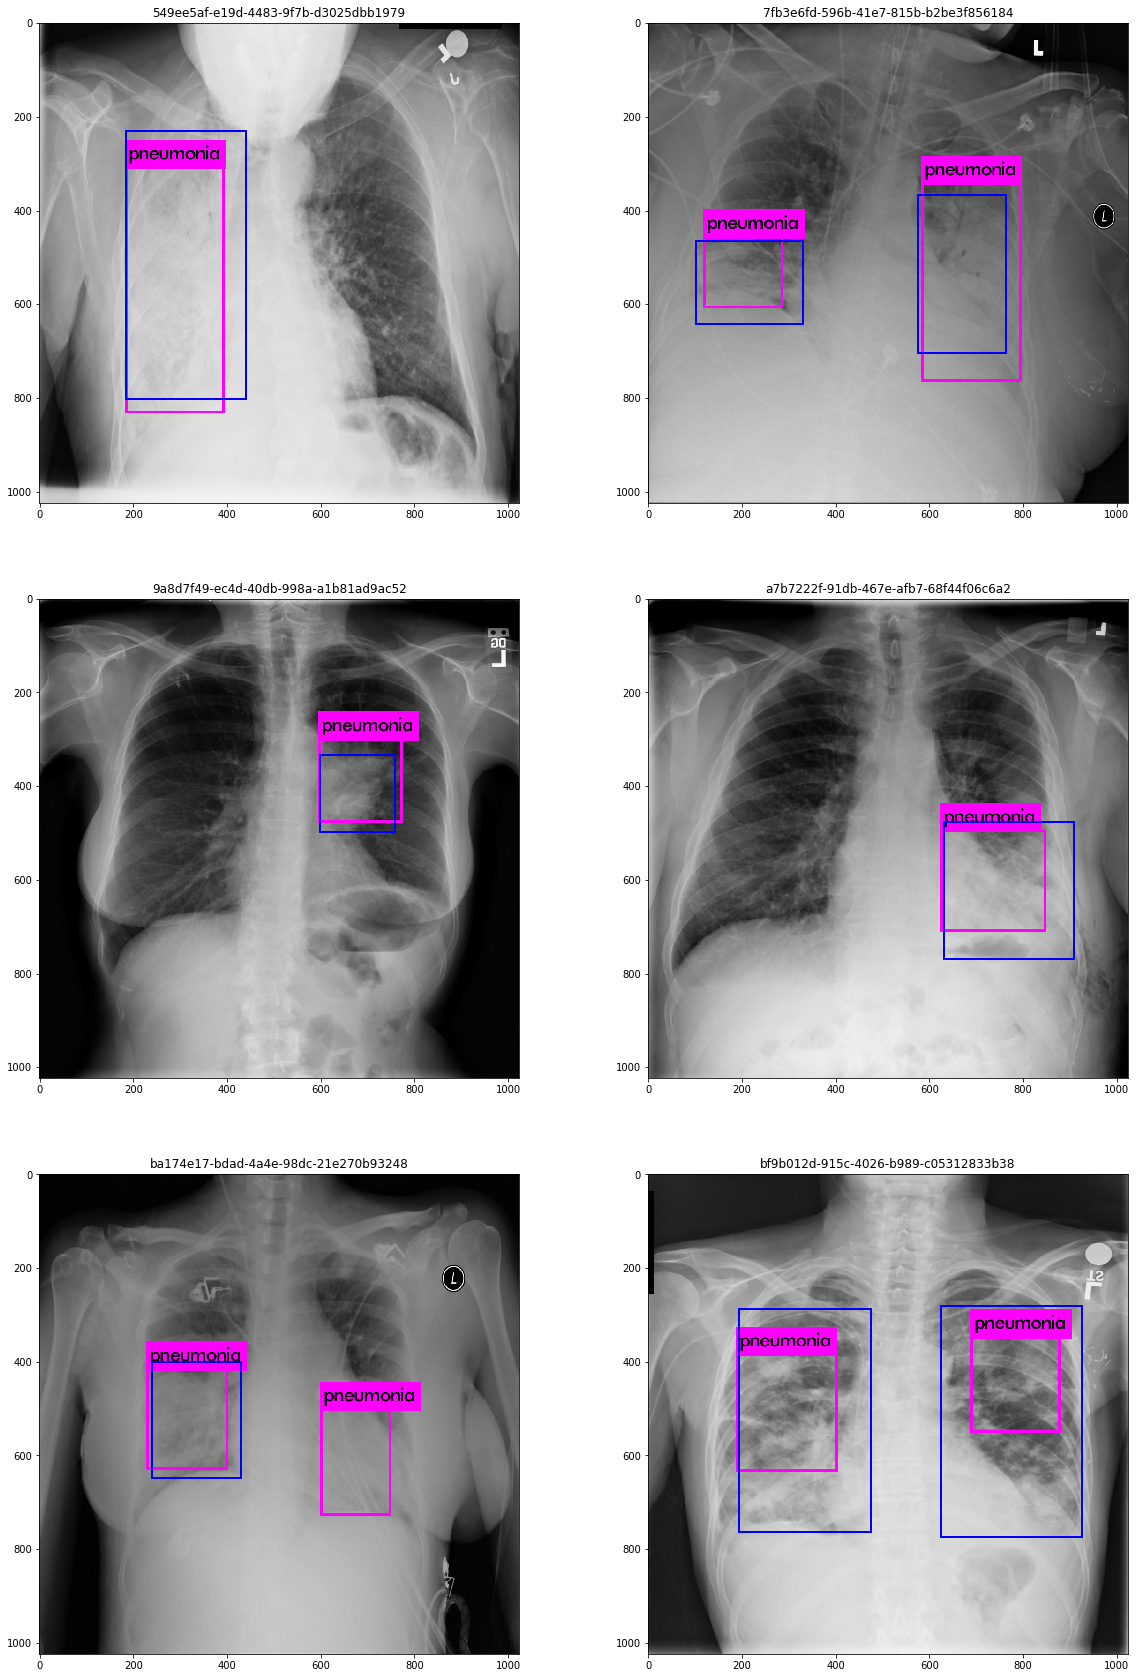

In [12]:
# group labels by patient ID and iterate; 
# for each group, show the x-ray as marked by the model, 
# then overlay the ground truth boxes

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
%matplotlib inline

fig, m_axs = plt.subplots(3, 2, figsize = (20, 30))
for c_ax, (pid, rows) in zip(m_axs.flatten(), df_sample_labels.groupby(['patientId'])):
    c_ax.imshow(np.array(Image.open('rsna/sample_pred/{}-pred.jpg'.format(pid))))
    c_ax.set_title(pid)
    for _, row in rows.iterrows():
        c_ax.add_patch(Rectangle((row['x'],row['y']), row['width'], row['height'], 
                    linewidth=2, edgecolor='b', facecolor='none'))


# Commentary

Even though the training of this model only reached an average error of approx 1.5, the comparisons above suggest that YOLO has potential for finding pneumonia in x-rays.  In the sample above, there is generally good agreement between the model's predictions and human diagnosis.  I would be interested to see what could be achieved by using YOLOv3 instead of v2, especially with more extensive training.

Especially interesting is the first x-ray in the bottom row, where the human diagnosed only one spot of pneumonia but the model found two. Obviously the model is still in a crude state and it probably just made a mistake. On the other hand, humans aren't perfect either, and the model clearly thought it saw something. And this is the whole motivation behind this competition.

# Fun Bonus!

The two images below are the results of applying the **_original_** YOLOv2 model (the one that detects 80 different kinds of objects) to the painting "The Scream" by Edvard Munch.

The image on the left is the output at the default detection threshold of 25% confidence.  The person in the foreground of the painting is distorted enough that the algorithm, which has no problem finding actual people in all kinds of snapshots, does not see a person, at least not at the 25% confidence level.

For the image on the right, the model was told to use a 5% detection threshold, with the result that it not only sees the person in the forgeground, it also sees the two people at the left of the painting, and a bunch of other weird stuff too (some of which almost make sense if you squint hard enough :))

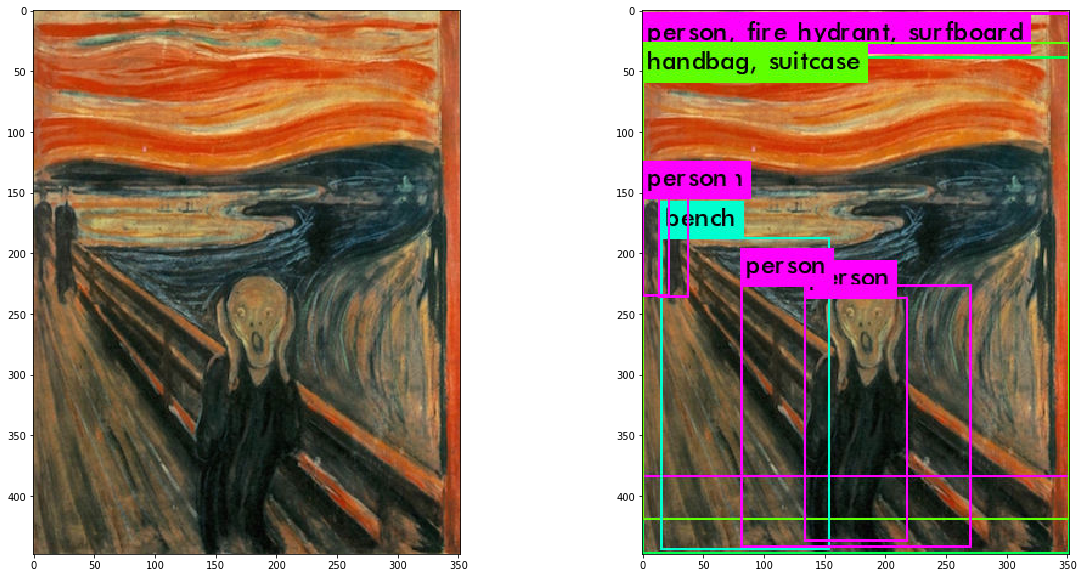

In [23]:
fig, m_axs = plt.subplots(1, 2, figsize = (20, 10))
m_axs[0].imshow(np.array(Image.open('rsna/bonus_jpg/scream-default.jpg')))
m_axs[1].imshow(np.array(Image.open('rsna/bonus_jpg/scream-05.jpg')))